# **análisis_conjunto_datos [100 puntos]**

## Análisis de conjunto de datos

*Esta tarea contribuye con el 50% de la evaluación global del curso.*

Para esta actividad deberás encontrar un conjunto de datos que sea de tu interés. Para ello, puedes consultar repositorios públicos de datos como:

- https://archive.ics.uci.edu/ml/index.php, 
- https://datos.gob.mx/ 
- o similares 

Elige alguna forma de tratar los datos. Toma como ejemplo las visualizaciones del material visto en el curso y adáptalo a los datos de tu conjunto de datos. 

Realiza la actividad de tal forma que muestres gráficas que ayuden a entender tú razonamiento y el análisis de tus datos, haz tantas gráficas como necesites para expresar la idea. 

Como parte final de esta actividad, deberás completar en una celda de Markdown 

- la(s) razón(es) por las que elegiste tú conjunto de datos
- la(s) razón(es) por la que elegiste analizar los datos de la forma en la que lo hiciste
- las conclusiones que surgen de tu análisis para tú conjunto de datos. Qué es lo que significan estos datos a la luz de tú análisis.

---
title: Análisis del conjunto de datos: Incidentes viales reportados por C5l"
author: "Dael Chávez Ferreyra - A01771963"
date15"09/05/20
output: pdf_document
chunk_output_type: inline
editor_options: 
  chunk_output_type: inlinepe: inline
---

##### Link de la base de datos: https://datos.cdmx.gob.mx/dataset/incidentes-viales-c5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

data = pd.read_csv('accidentes_viales.csv')
data

,folio,fecha_creacion,hora_creacion,dia_semana,fecha_cierre,hora_cierre,tipo_incidente_c4,incidente_c4,alcaldia_inicio,latitud,longitud,codigo_cierre,clas_con_f_alarma,tipo_entrada,alcaldia_cierre,colonia
0,C2C/20211229/00212,2021-12-29,23:21:20,Miércoles,2022-01-01,00:24:06,Lesionado,Atropellado,NaN,19.421610,-99.163670,I,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,NaN,ROMA NORTE I
1,C2C/20211231/00183,2021-12-31,23:48:03,Viernes,2022-01-01,06:29:52,Lesionado,Atropellado,CUAUHTEMOC,19.409910,-99.144270,A,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,CUAUHTEMOC,OBRERA III
2,C2C/20220101/00012,2022-01-01,01:06:39,Sábado,2022-01-01,06:00:12,Accidente,Choque con lesionados,CUAUHTEMOC,19.415250,-99.148320,A,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,CUAUHTEMOC,DOCTORES IV
3,C2C/20220101/00070,2022-01-01,09:51:53,Sábado,2022-01-01,12:54:10,Accidente,Motociclista,CUAUHTEMOC,19.443649,-99.165781,A,URGENCIAS MEDICAS,RADIO,CUAUHTEMOC,TLAXPANA
4,C2N/20211231/00128,2021-12-31,23:03:05,Viernes,2022-01-01,06:16:42,Accidente,Choque sin lesionados,IZTACALCO,19.414620,-99.060450,A,EMERGENCIA,BOTÓN DE AUXILIO,IZTACALCO,PANTITLAN II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363367,C5/20230731/03777,2023-07-31,19:58:53,Lunes,2023-07-31,23:03:18,Accidente,Motociclista,MIGUEL HIDALGO,19.438670,-99.212280,A,URGENCIAS MEDICAS,LLAMADA DEL 911,MIGUEL HIDALGO,LOS MORALES (POLANCO)
363368,C5/20230730/04886,2023-07-30,21:00:36,Domingo,2023-07-31,00:03:11,Accidente,Vehículo atrapadovarado,IZTACALCO,19.405427,-99.070767,F,EMERGENCIA,LLAMADA DEL 911,IZTACALCO,PANTITLAN III
363369,C5/20230731/00044,2023-07-31,00:09:49,Lunes,2023-07-31,03:13:11,Accidente,Vehículo atrapadovarado,ALVARO OBREGON,19.373010,-99.263510,A,EMERGENCIA,LLAMADA DEL 911,ALVARO OBREGON,PASEO DE LAS LOMAS-SAN GABRIEL
363370,C2P/20230731/00029,2023-07-31,05:58:49,Lunes,2023-07-31,09:13:12,Accidente,Motociclista,MIGUEL HIDALGO,19.430230,-99.202610,D,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,MIGUEL HIDALGO,PALMITAS (POLANCO)


In [2]:
conteo_dias = data['dia_semana'].value_counts()
conteo_dias

dia_semana
Sábado       61391
Viernes      57168
Domingo      53545
Jueves       49127
Miércoles    47842
Martes       47668
Lunes        46631
Name: count, dtype: int64

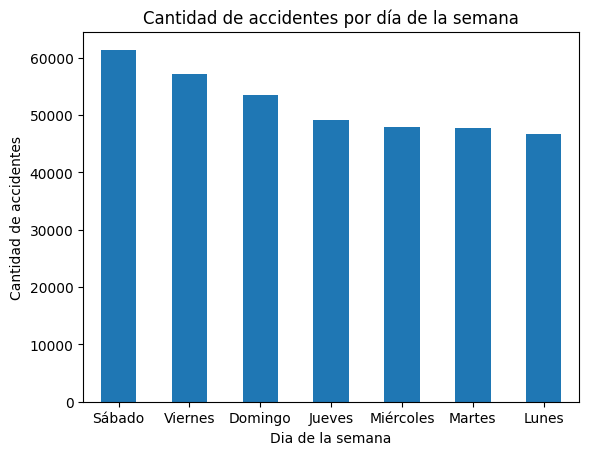

In [3]:
conteo_dias = data['dia_semana'].value_counts()
conteo_dias.plot(kind='bar')
plt.xlabel('Dia de la semana')
plt.ylabel('Cantidad de accidentes')
plt.title('Cantidad de accidentes por día de la semana')
plt.xticks(rotation=0)
plt.show()

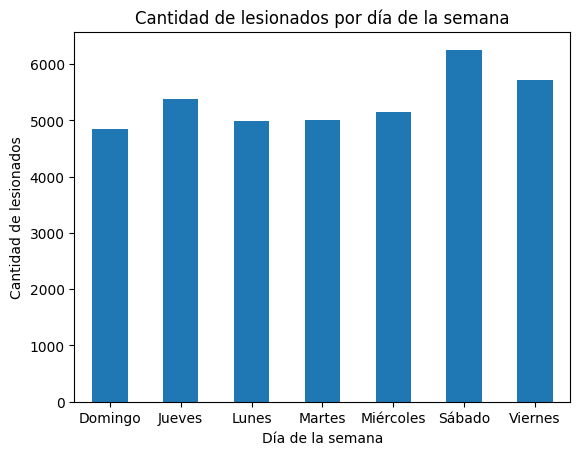

In [4]:
conteo_lesionado = data['tipo_incidente_c4'].str.count('Lesionado').sum()
conteo_por_dia = data.groupby('dia_semana')['tipo_incidente_c4'].apply(lambda x: x.str.count('Lesionado').sum())
dia_mas_repetido = conteo_por_dia.idxmax()
conteo_por_dia.plot(kind='bar')
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad de lesionados')
plt.title('Cantidad de lesionados por día de la semana')
plt.xticks(rotation=0)
plt.show()

In [5]:
dia_especifico = 'Sábado'
filtro = data['dia_semana'] == dia_especifico
conteo_lesionado_dia = data[filtro]['tipo_incidente_c4'].str.count('Lesionado').sum()
print(f'El día {dia_especifico} se informaron alrededor de {conteo_lesionado_dia} lesionados desde 2014 hasta 2023.')

El día Sábado se informaron alrededor de 6254 lesionados desde 2014 hasta 2023.


In [6]:
dia_especifico = 'Lunes'
filtro = data['dia_semana'] == dia_especifico
conteo_lesionado_dia = data[filtro]['tipo_incidente_c4'].str.count('Lesionado').sum()
print(f'El día {dia_especifico} se informaron alrededor de {conteo_lesionado_dia} lesionados desde 2014 hasta 2023.')

El día Lunes se informaron alrededor de 4995 lesionados desde 2014 hasta 2023.


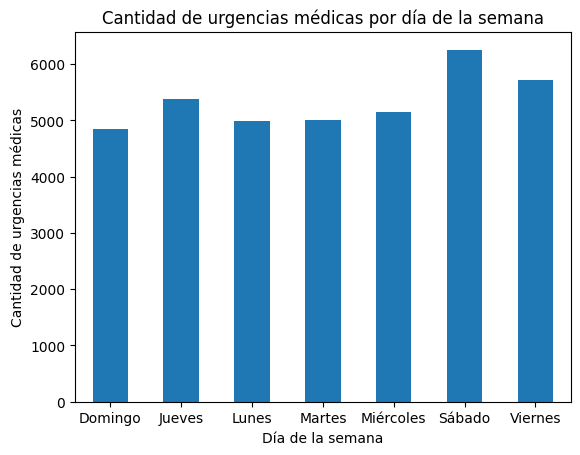

In [7]:
conteo_urgencias = data['clas_con_f_alarma'].str.count('URGENCIAS MEDICAS').sum()
conteo_por_dia1 = data.groupby('dia_semana')['tipo_incidente_c4'].apply(lambda x: x.str.count('Lesionado').sum())
dia_mas_repetido = conteo_por_dia.idxmax()
conteo_por_dia1.plot(kind='bar')
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad de urgencias médicas')
plt.title('Cantidad de urgencias médicas por día de la semana')
plt.xticks(rotation=0)
plt.show()

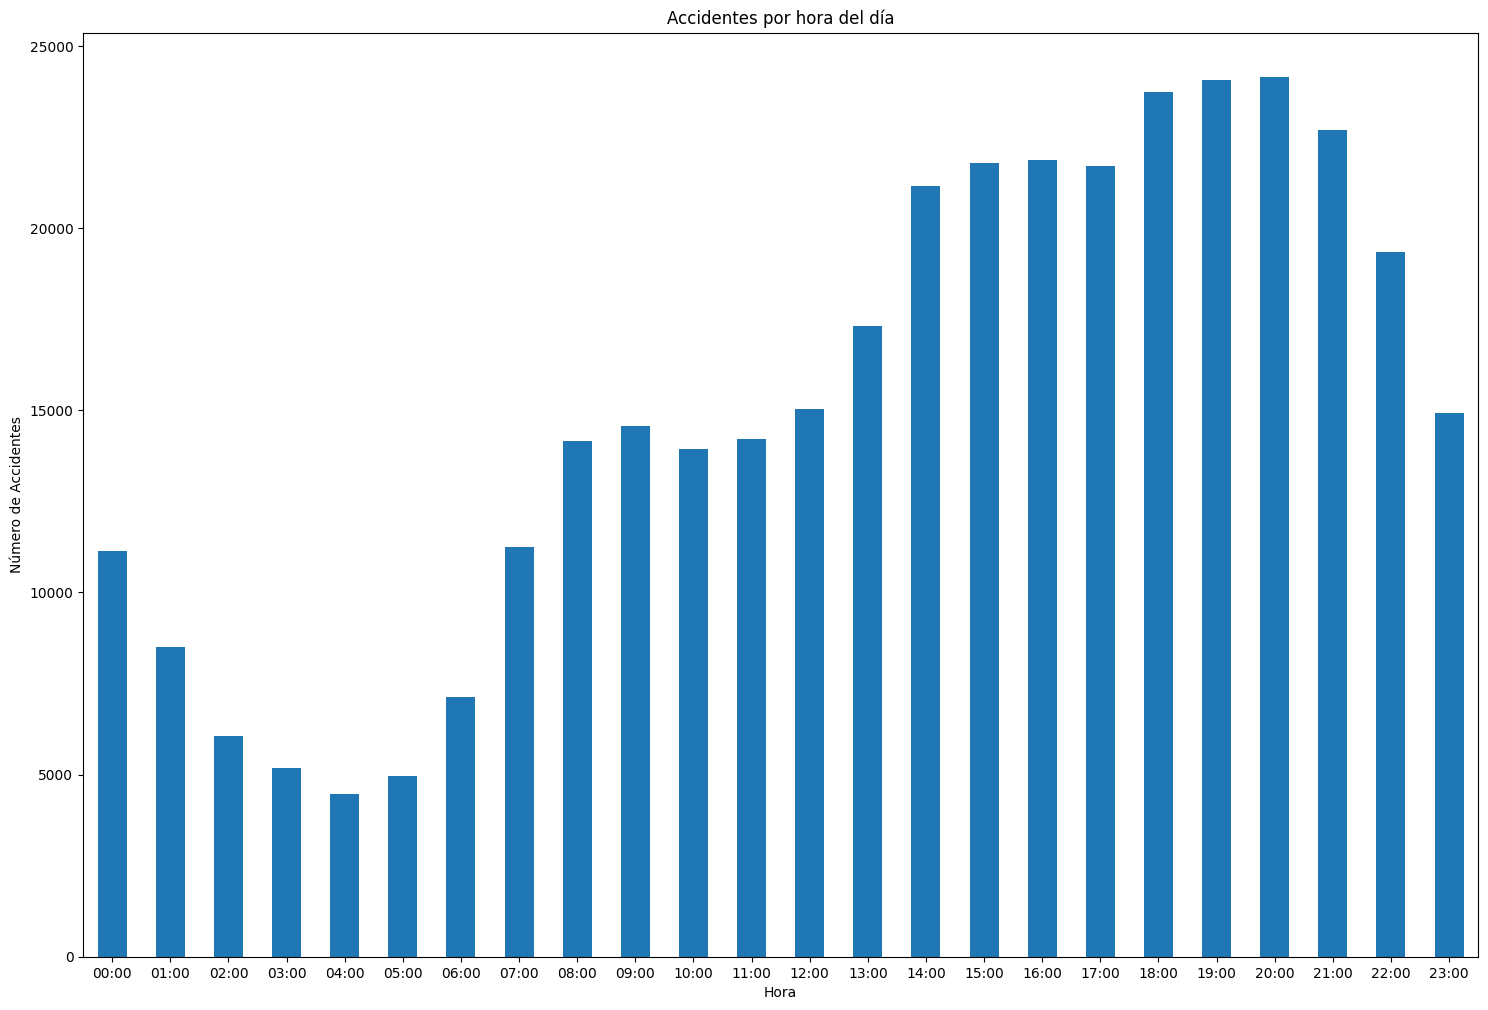

In [8]:
data['hora_creacion'] = pd.to_datetime(data['hora_creacion'], format='%H:%M:%S')
conteo_por_hora = data.groupby(data['hora_creacion'].dt.hour).size()
plt.figure(figsize=(18, 12))
conteo_por_hora.plot(kind='bar')
plt.xlabel('Hora')
plt.ylabel('Número de Accidentes')
plt.title('Accidentes por hora del día')
plt.xticks(range(len(conteo_por_hora.index)), [f'{hour:02d}:00' for hour in conteo_por_hora.index], rotation=0)
plt.show()

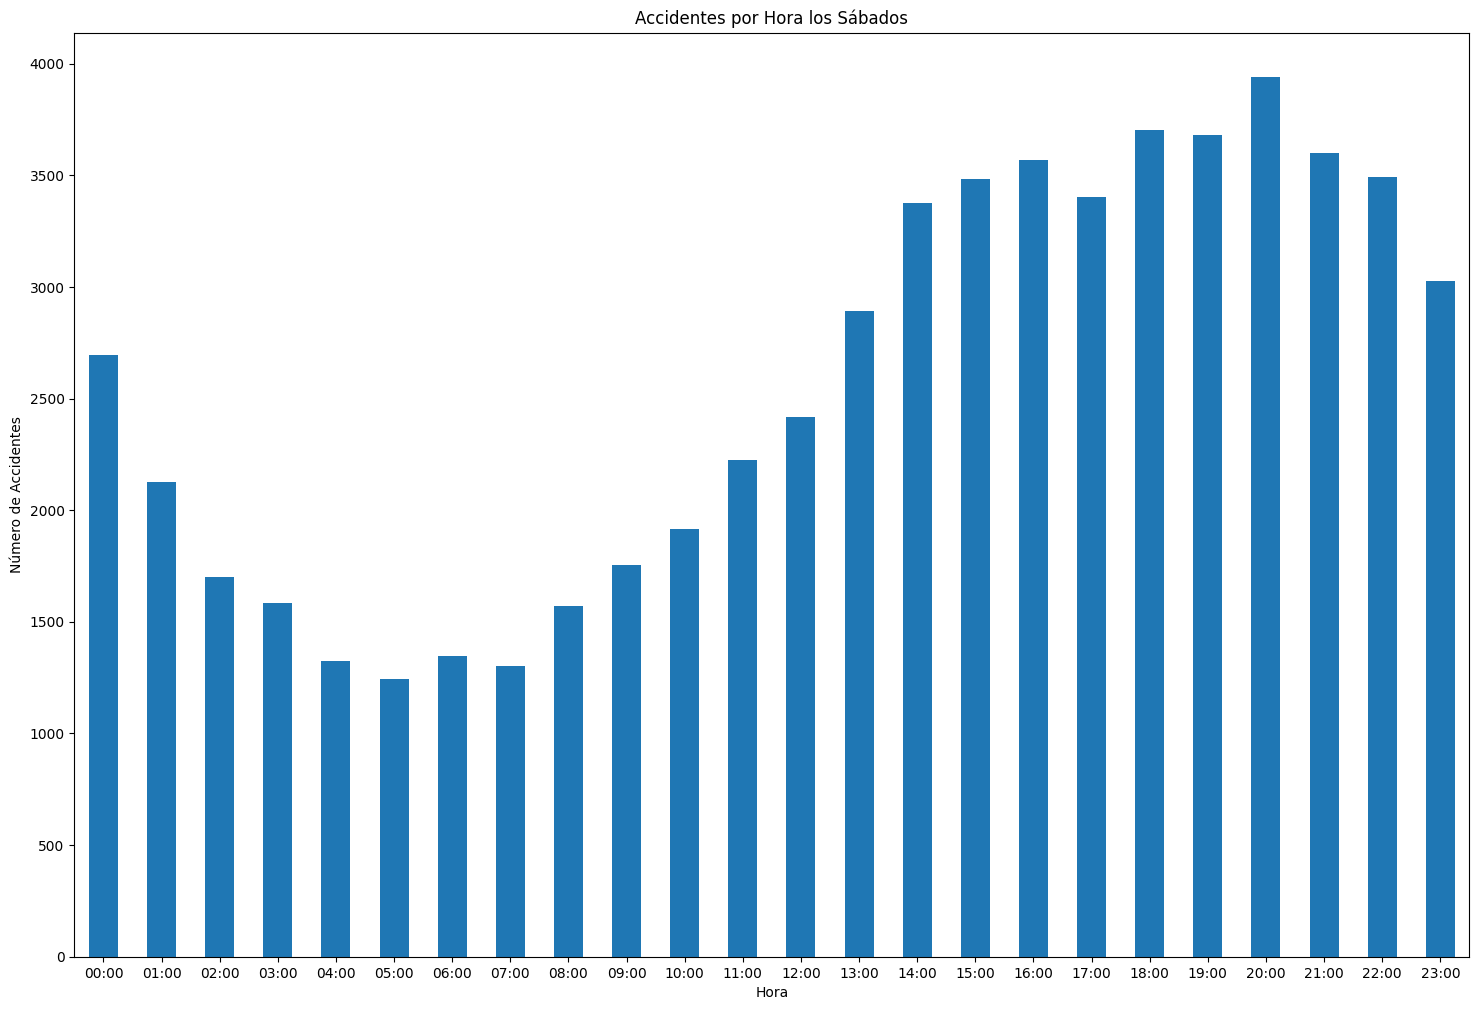

In [9]:
data['hora_creacion'] = pd.to_datetime(data['hora_creacion'], format='%H:%M:%S')
accidentes_sabados = data[data['dia_semana'] == 'Sábado']
conteo_por_hora_sabados = accidentes_sabados.groupby(accidentes_sabados['hora_creacion'].dt.hour).size()


plt.figure(figsize=(18, 12))
conteo_por_hora_sabados.plot(kind='bar')
plt.xlabel('Hora')
plt.ylabel('Número de Accidentes')
plt.title('Accidentes por Hora los Sábados')
plt.xticks(range(len(conteo_por_hora_sabados.index)), [f'{hour:02d}:00' for hour in conteo_por_hora_sabados.index], rotation=0)
plt.show()

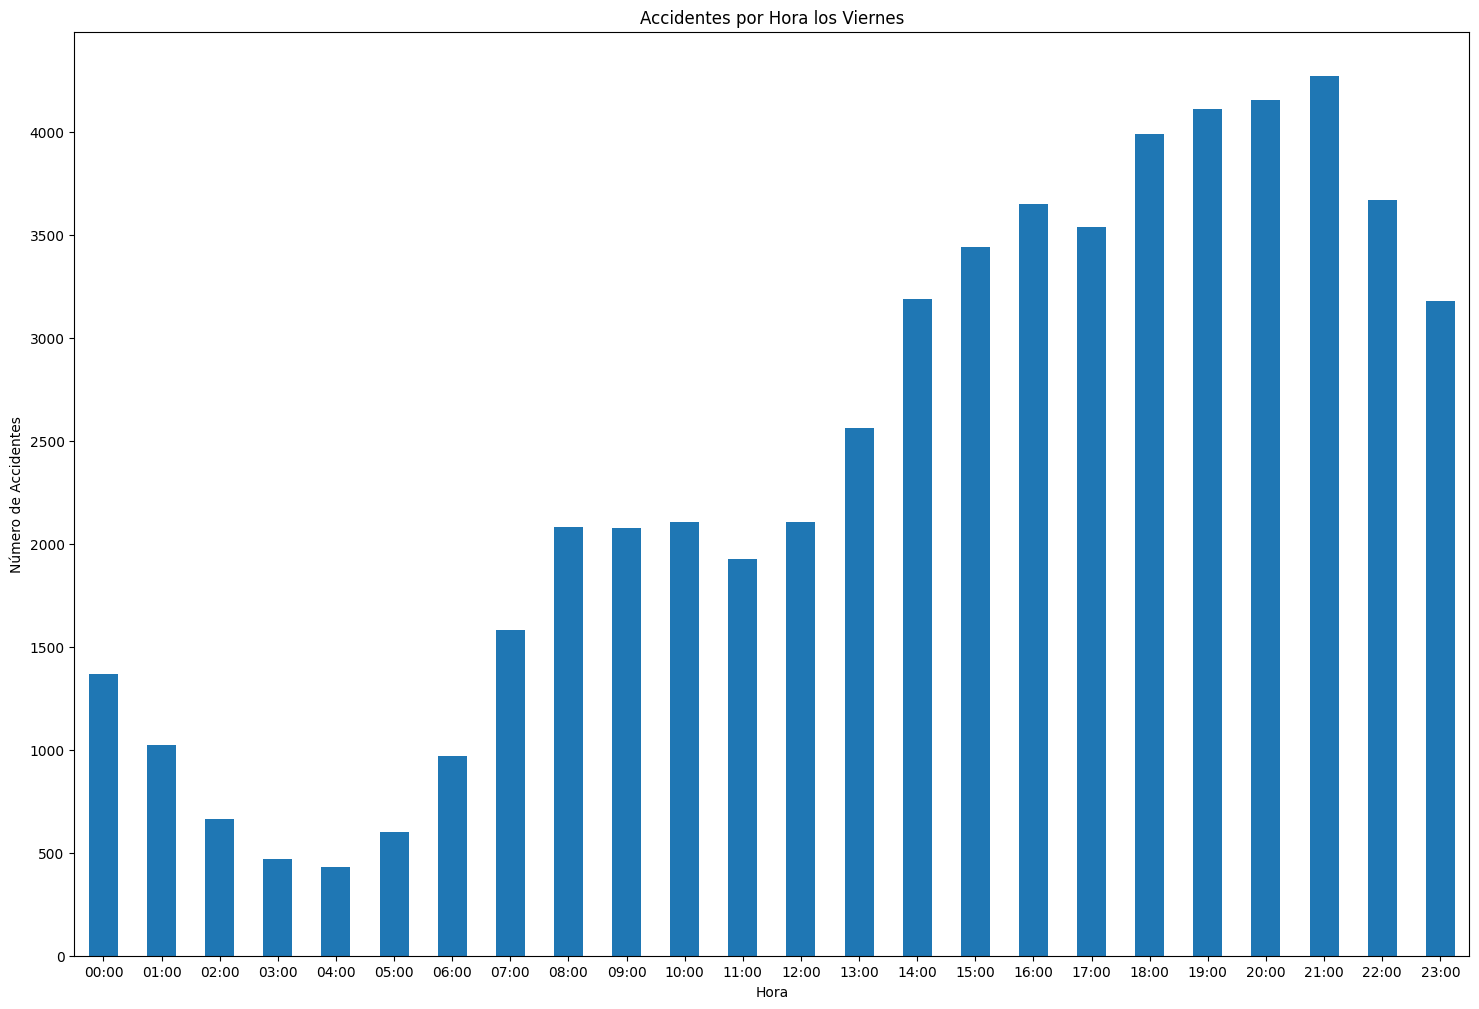

In [10]:
accidentes_viernes = data[data['dia_semana'] == 'Viernes']
conteo_por_hora_viernes = accidentes_viernes.groupby(accidentes_viernes['hora_creacion'].dt.hour).size()

plt.figure(figsize=(18, 12))
conteo_por_hora_viernes.plot(kind='bar')
plt.xlabel('Hora')
plt.ylabel('Número de Accidentes')
plt.title('Accidentes por Hora los Viernes')
plt.xticks(range(len(conteo_por_hora_viernes.index)), [f'{hour:02d}:00' for hour in conteo_por_hora_sabados.index], rotation=0)
plt.show()

#### La(s) razón(es) por las que elegiste tú conjunto de datos: <br>
Escogí esta base de datos para saber cuales son los días y a qué hora habían más accidentes automovilísticos, en este caso son de la ciudad de México. Y así confirmar mi idea de que los fines de semana son en los que más automovilistas sufren más accidentes.
#### La(s) razón(es) por la que elegiste analizar los datos de la forma en la que lo hiciste: <br>
Primero lo que hice fue analizar la cantidad de veces que se repetían los días de la semana en la base de datos. Por ejemplo, las veces que se menciona el día Sábado en el conjunto de datos es 61,391 veces y el día Lunes se repite 46,631 veces. Con esos datos ya me podía dar una idea de en que día había más accidentes. Pero, para poder observar mejor esto, decidí graficarlo y efectivamente, los días en los que más accidentes hay, son los días Sábado, Viernes y Domingo, y los días en los que menos, son los días Lunes y Martes. <br>
Luego quería analizar si la cantidad de lesionados tenía que ver con el día de la semana, entonces grafiqué el dia de la semana con respecto a la cantidad de lesionados y sorprendentemente el patrón se repitió, la mayor cantidad de lesionados también se encontraban en los días Sábado y Viernes. Esto lo hice analizando cuantas veces se repetía la palabra Lesionado en la columna "tipo_incidente_c" y lo grafiqué respecto los días de la semana. Para este análisis me fue muy útil la función groupby(). <br>

Despúes, quise hacer lo mismo que con la gráfica que hice anteriormente, pero ahora analizando la relación del día de la semana con la necesidad de urgencia médica, para saber si el patrón se mantenía y saber completamente la gravedad de los accidentes. Y de nuevo al momento de graficar, el reultado fue el mismo, los días Viernes y Sábado eran los días que tenían mayor número de urgencias médicas.
Algo que llamó mi atención es que en la grafica de cantidad de lesionados y en la de urgencias médicas, el día Jueves destaca al igual que el Viernes y Sábado. <br>

Finalmente hice tres gráficas identicas, estás gráficas muestran las horas en las que hay más accidentes. Esto lo hice con el objetivo de saber si otro parámetro a parte del día de la semana, tenía algo que ver con la cantidad de accidentes, porque tenía la idea de que entre más tarde en el día, más accidentes hay. 
La primera de estas gráficas muestra solamente las horas en las que hay más accidentes y efectivamente, al momento de gráficar, los datos muestran que depués de las 5:00 pm hay más accidentes y estos se reducen cuando empieza a amanecer. Pero esta gráfica no era suficiente, ahora tenía que saber si también en los días con más accidentes, la mayoría de estos eran durante estás horas, así que grafiqué las horas pero ahora filtrando por día. Así que gráfique por la cantidad de accidentes por hora, el día Sábado y el Viernes, y aunque entre estos días hay diferencia entre la hora con más accidentes, el rango de horas con mayor número de accidentes se repite. <br>

Utilicé gráficas de barras porque consideré que era la mejor manera en la que podía comparar sencillamente los datos. 
#### Las conclusiones que surgen de tu análisis para tú conjunto de datos. Qué es lo que significan estos datos a la luz de tú análisis: <br>
En conclusión, efectivamente los fines de semana desde las 5:00 pm hasta las 11:00 pm, son los momentos en los que más accidentes automovilisticos son procados y muestran un aumento en las urgencias médicas y los lesionados. Lo que da a entender que es más probable tener un accidente grave los fines de semana, que en cualquier otro día. Esto comfirmó mi idea sobre qué es más riesgoso, manejar durante fines de semana después del atardecer.